# Homework 04 - Data Visualization
(Total 5 points)  
Homework 04 is due **10/15/2023** Sun. 11:59pm  

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Question 1 (2 points, 0.5 point for each sub-question)

Problem 1 Given the data as the follows:

In [3]:
# given the data as below
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)  #Return evenly spaced numbers over a specified interval.
y = np.cos(x)
y1 = np.sin(x)

Given the data `x`, `y`, and `y1` above, complete the code and create the plot as instructed.

(Answers for Q1 1-4 should be written together in coding area below in order to generate a single plot)

**1-1**: Create a line plot to show `x, y and y1` (two lines) in the same plot, and define plot **"title"** as "Functions sin and cos" 

**1-2**: Format the ticks at specific values 

For x ticks, the value is `['$-\pi$', '$-\pi/2$', '$0$', '$+\pi/2$', '$+\pi$']`, at the location `[-np.pi, -np.pi/2, 0, np.pi/2, np.pi]`  
For y ticks, the value is `['$-1$', '$0$', '$+1$']`, at the location `[-1, 0, +1]`  

*hint: use `xticks` and `yticks` function*. And you will see the strange formula such as `r'$-\pi$'` will turn into nice mathematics presentation after you run the full code.

**1-3** draw a horizontal line and vertical line at 0 using `axhline` and `axvline` function (default settings)

**1-4** set x limit of -2 to 2, and y limit of -1 to 1

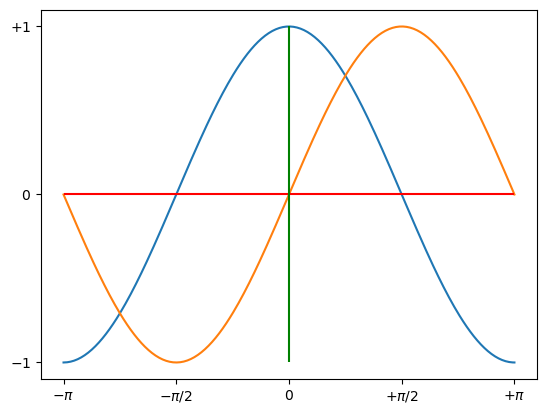

In [4]:
# 1-1 provide your answer here
plt.plot(x, y, x, y1)
# 1-2 provide your answer here
plt.xticks(labels = ['$-\pi$', '$-\pi/2$', '$0$', '$+\pi/2$', '$+\pi$'],
           ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# 1-3 provide your answer here
plt.yticks(labels = ['$-1$', '$0$', '$+1$'],
           ticks = [-1, 0, +1])
# 1-4 provide your answer here
plt.hlines(y = 0, xmin = -np.pi, xmax = np.pi, color = "red") #or axhline() 
plt.vlines(x = 0, ymin = -1, ymax = 1, color = "green") #axvline()

# then plot a figure
plt.show()

**1-4** Using "fig.add_subplot()" to plot line 1 for (x, y) and line 2 for (x, y1) in a grid space of 1 row by 2 columns. Set the linewidth to 5, linestyle is dash line, and color to red and blue, respectively. Then show the plot.

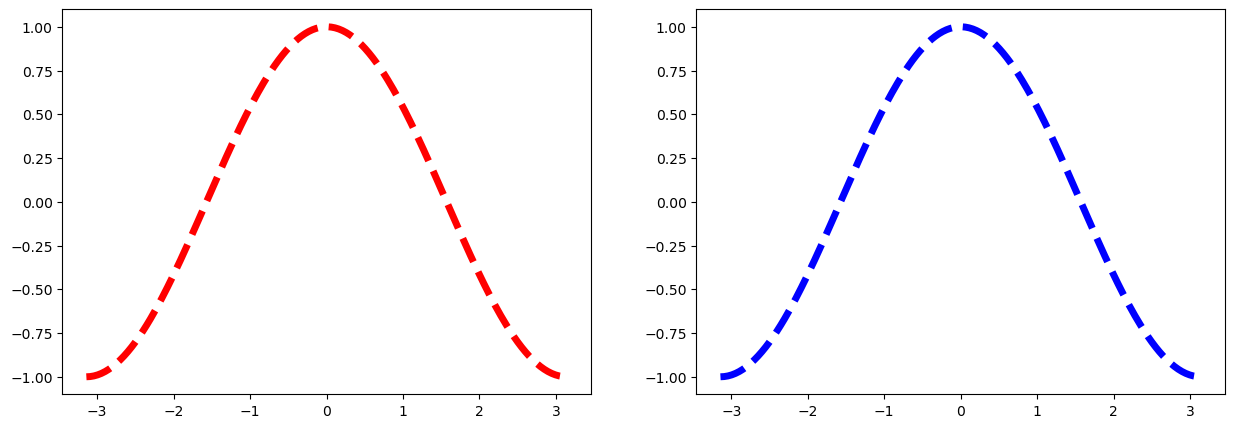

In [5]:
#use explicit method to plot a 1 by 2 figure, given the figure size privide as below
fig = plt.figure(figsize=(15,5))

# 1-5 provide your answer here add 2 subplots per instruction to a declared dimension of 1 row, 2 columns
fig.add_subplot(1,2,1)
plt.plot(x,y, linewidth = 5, linestyle = "--", color = 'r')
fig.add_subplot(1,2,2)
plt.plot(x,y, linewidth = 5, linestyle = "--", color = 'b')    
plt.show()

#plot the 1 by 2 plot together
plt.show()

## Problem 2 Iris Data Analysis 
3 points: each question with 0.5 point

The `Iris` flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.* Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

For homework, we will perform initial exploratory data analysis (EDA) and visualization using the dataset.

In [6]:
#given the data set
from sklearn import datasets
iris = datasets.load_iris()

In [7]:
IRIS = pd.DataFrame(iris.data, columns = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"])
print(IRIS.shape)
IRIS.head()

(150, 4)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X_Type = iris.target
X_Name = ['Setosa','Versicolour', 'Virginica']
IRIS['Type'] = np.where(X_Type == 0, X_Name[0], np.where(X_Type == 1, X_Name[1], X_Name[2]))

In [9]:
print(IRIS.shape)
IRIS.head()

(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Q2-1 (0.5 point)
It will be interesting to see if the numeric values `sepal_length, sepal_width, pedal_length, pedal_width` has any kind of relationships among them.  
Looking at the correlation among the variables is normally a good start for getting insights of the data/fields.  

For homework exercise, use the `corr` and `sns.heatmap` function (taught in class) to plot the correlation heatmap among the four numeric variables. 
Your output figures should be similar to the output plot as below that the pairwise correlations are shown in the plot with "annot=True".  

              Sepal_Length  Sepal_Width  Petal_Length
Sepal_Length      1.000000     -0.11757      0.871754
Sepal_Width      -0.117570      1.00000     -0.428440
Petal_Length      0.871754     -0.42844      1.000000


<Axes: >

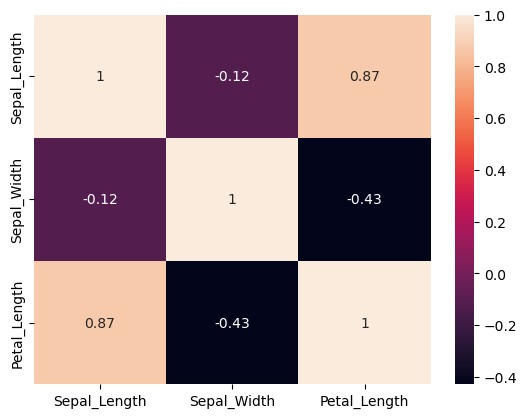

In [10]:
# provide your answer here to get correlation matrix of IRIS data
iris_corr = IRIS.iloc[:, :3].corr()
print(iris_corr)

#plot a heatmap of correlation matrix
import seaborn as sns
sns.heatmap(iris_corr, annot=True)



As is expected, there is a strong correlation between `pedal_length, pedal_width` ($\rho = 0.96$).   
However, the relationship between the `sepal_length, sepal_width` is not so clear ($\rho = -0.12$).

Given the above information, seems the relationship between `sepal_length, sepal_width` is not so clear, let's try more charting methodologies to see if there is any clue (as learning experience, some types of charts may not work well)

### Q2-2 Line Chart (0.5 point): 
Given the IRIS is imported as pandas, we can pd.plot.line() to plot line chart for `Sepal_Length` and `Sepal_Width` columns. **One line for each column**. Show the legends to distinguish which line stands for. Your output figures should be similar to the outoput as below.

hints: you can use either plt.plot() or df.plot()

<Axes: >

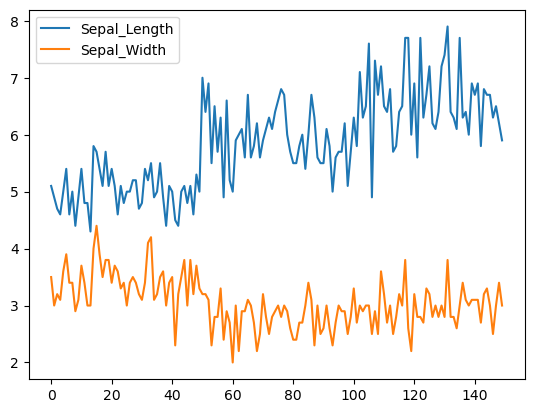

In [11]:
#provide your answer here to plot 2 lines defined by `Sepal_Length` and `Sepal_Width`

#df.plot()
IRIS[['Sepal_Length', 'Sepal_Width']].plot.line()

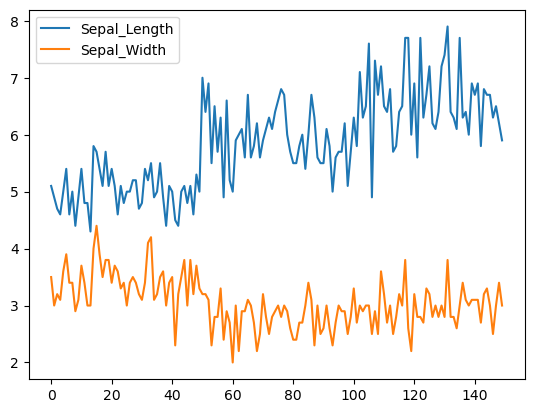

In [12]:
plt.plot(IRIS.Sepal_Length, label = "Sepal_Length")
plt.plot(IRIS.Sepal_Width, label = "Sepal_Width")
plt.legend()
plt.show()

Seems line chart does not offer a lot of clues. We may want to switch to different charts.

### Q2-3 Histogram (0.5 point): 
Plot histogram for `Sepal_Length` and `Sepal_Width` columns. One **chart** for each column in a grid space of 1 row by 2 columns using layout=(1,2). Show the legends to distinguish which line stands for. Your output figures should be similar to the output example.

hints: use plt.hist() or df.plot.hist() w/ subplot option

array([[<Axes: title={'center': 'Sepal_Length'}>,
        <Axes: title={'center': 'Sepal_Width'}>]], dtype=object)

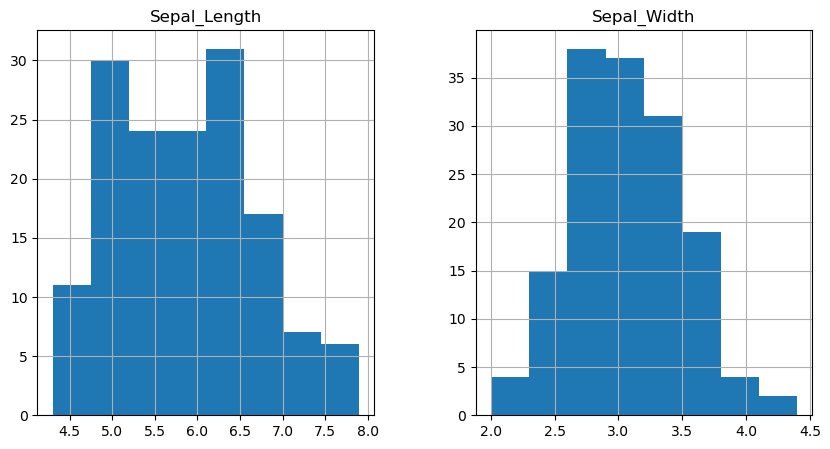

In [13]:
#provide your answer here 'Sepal_Length', 'Sepal_Width' size by size

IRIS[['Sepal_Length', 'Sepal_Width']].hist(layout = (1,2), bins = 8, 
                                           figsize = (10, 5))


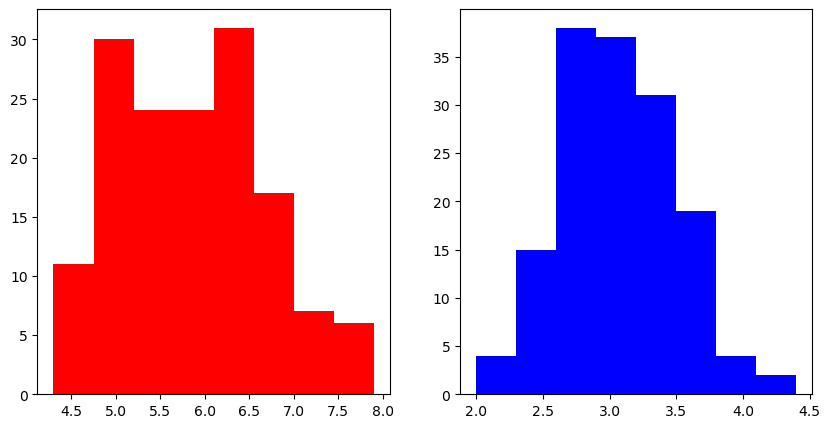

In [14]:
fig = plt.figure(figsize=(10,5))

# 1-5 provide your answer here add 2 subplots per instruction to a declared dimension of 1 row, 2 columns
fig.add_subplot(1,2,1)
plt.hist(IRIS.Sepal_Length, bins = 8, linewidth = 5, linestyle = "--", color = 'red')
fig.add_subplot(1,2,2)
plt.hist(IRIS.Sepal_Width, bins = 8, linewidth = 5, linestyle = "--", color = 'blue')
plt.show()

Both line chart and histogram provide limited information about the data. Let's explore some other ways.

### Q2-4  Scatter plot of 2 columns of IRIS dataset (0.5 point)

Use the `implicit` method shownd in the class note

For the two `Sepal_Length` and `Sepal_Width` fileds, in order to explore their relationship, treat them as y and x variables seperately (`x='Sepal_Length', y='Sepal_Width'`).    
Use the `scatter` function to create the plot.

hints: use df.plot.scatter() or plt.scatter()

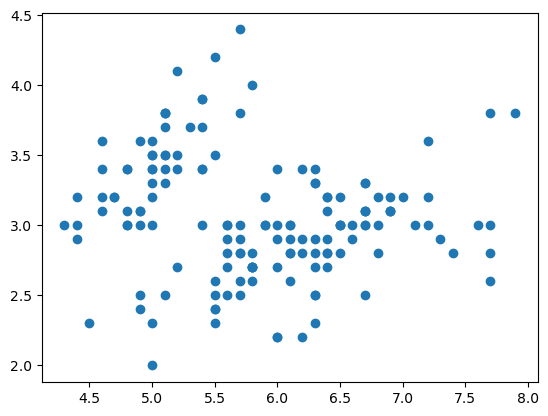

In [15]:
# provide your answer here plot scatter of Sepal_Length (x) by Sepal_Width (y)

plt.scatter(IRIS.Sepal_Length, IRIS.Sepal_Width)


### Q2-5 Scatter plot 2 (0.5 point)
Alternatively, use the `explicit` method shownd in the class note, first create a figure and an axis (`fig` and `ax`) using `plt.subplots` method.   

hints:
1) Use `ax` object to create the scatter plot.  
2) Give the plot a title and (x and y) labels using `.set_title()`, `set_xlabel()`, `set_ylabel()`.   
3) Complete the code below to create the plot shown in the target result sheet

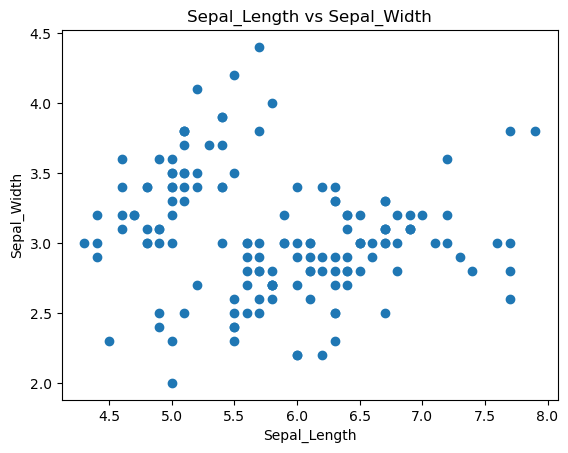

In [16]:
# create placeholder of figure and axis for later definition
fig, ax = plt.subplots()

# scatter the Sepal_Length against the Sepal_Width
# provide your answer here
ax.scatter(IRIS.Sepal_Length, IRIS.Sepal_Width)

# set a title
# provide your answer here
ax.set_title('Sepal_Length vs Sepal_Width')
    
# set x labels
# provide your answer here
ax.set_xlabel("Sepal_Length")

# set y labels
# provide your answer here
ax.set_ylabel("Sepal_Width")


# provide your answer here
plt.show()

### Q2-6 Scatter plot 3 (0.5 point)
Iris has three types, 'Setosa', 'Versicolour' and 'Virginica'. the relationship among them are still not clear. Let's keep digging. Next we would like to distinsh the scatter dots with three differernt colors to show how the three types in the above scatter chat (may consider using explicit method and for loop), and see if there is change in the observed relationship.

hint: you may create a list of the length of IRIS with 3 different colors, e.g use `color = colors[IRIS.Type][i]]` in your scatter plot settings, in order to leveraging colors = {'Setosa':'r', 'Versicolour':'g', 'Virginica':'b'}

In [17]:
# check the unique type of "Type"
IRIS_Type_unique = IRIS.Type.unique()
IRIS_Type_unique

array(['Setosa', 'Versicolour', 'Virginica'], dtype=object)

In [20]:
# create color dictionary called "colors", e.g. Setosa will be labeled red, Versicolour will be green, and Virginica will be blue
colors = {IRIS_Type_unique[0]:'r', IRIS_Type_unique[1]:'g', IRIS_Type_unique[2]:'b'}

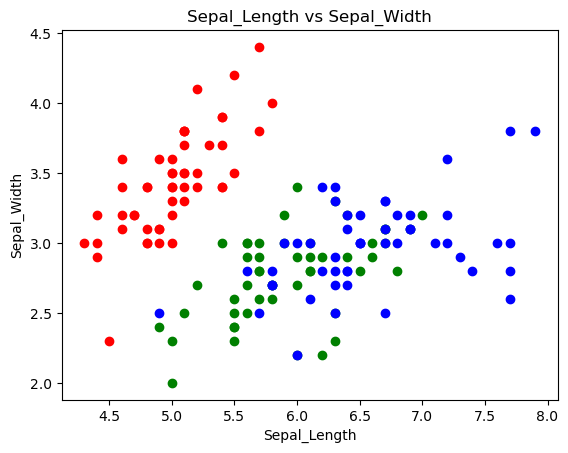

CPU times: user 343 ms, sys: 3.93 ms, total: 347 ms
Wall time: 350 ms


In [25]:
%%time 

# create a figure and axis ("explicit" method)
fig, ax = plt.subplots()

# plot by Type using three different colors
for i in IRIS_Type_unique:
    # provide your answer here
    ax.scatter(IRIS.loc[IRIS.Type == i, 'Sepal_Length'], 
               IRIS.loc[IRIS.Type == i, 'Sepal_Width'], 
               color = colors[i])
    
# set a title as Q2-6
# provide your answer here
ax.set_title('Sepal_Length vs Sepal_Width')

# set x label as Q2-6
# provide your answer here
ax.set_xlabel('Sepal_Length')

# set y label as Q2-6
# provide your answer here
ax.set_ylabel('Sepal_Width')

#save the figure to a image file udner a name of '"IRIS_scatterplot3.png"
plt.savefig("IRIS_scatterplot3.png")
plt.show()

    
#plot the figure (yours could be slightly different from this)
plt.show()

In [22]:
colors

{'Setosa': 'r', 'Versicolour': 'g', 'Virginica': 'b'}

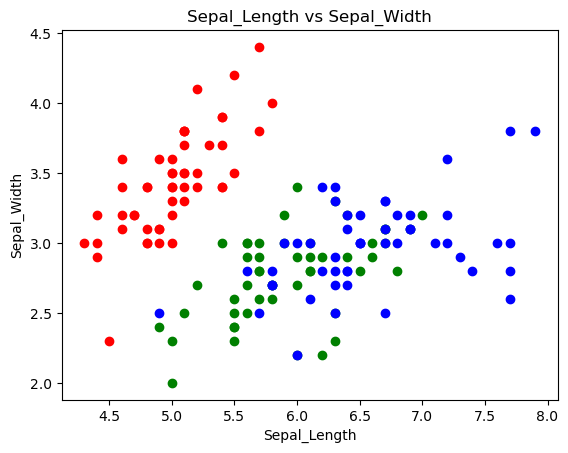

CPU times: user 2.65 s, sys: 7.61 ms, total: 2.66 s
Wall time: 2.66 s


In [24]:
%%time 

# create a figure and axis ("explicit" method)
fig, ax = plt.subplots()

#plot row by row
for i in range(len(IRIS)):
    # provide your answer here
    color_i =  colors[IRIS.Type[i]]
    
    ax.scatter(IRIS.Sepal_Length[i], 
               IRIS.Sepal_Width[i],
               color =color_i)
    
# set a title as Q2-6
# provide your answer here
ax.set_title('Sepal_Length vs Sepal_Width')

# set x label as Q2-6
# provide your answer here
ax.set_xlabel('Sepal_Length')

# set y label as Q2-6
# provide your answer here
ax.set_ylabel('Sepal_Width')

#save the figure to a image file udner a name of '"IRIS_scatterplot3.png"
plt.savefig("IRIS_scatterplot3.png")
plt.show()

    
#plot the figure (yours could be slightly different from this)
plt.show()

In [26]:
'''based on the return of %%time which check the computation time, 
the method 1 takes 0.35 sec, while method 2 takes 2.66 sec.''' 

'based on the return of %%time which check the computation time, \nthe method 1 takes 0.35 sec, while method 2 takes 2.66 sec.'